**Autor:** Jose Ricardo Mendoza Villar  
371012 Base de Datos
Tarea Dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
def customBarPlot(x, y, title, rotation = 45):
    plt.figure(figsize=(16,8))
    plt.bar(x, y)
    plt.title(title)
    plt.xticks(rotation = rotation, ha = "right", fontsize = 10)
    plt.show()

In [3]:
mysql_conn = create_engine(f"mysql://root:password@db:3306/ciencia_de_datos")

### Graficar el número de SNIs por carrera

In [4]:
snis_carrera = pd.read_sql_query(
    """
    SELECT
    	carreras.nombre as carrera,
    	SUM(CASE
            WHEN sni.fin >= '2025-01-28' THEN 1 -- VIGENTES
            ELSE 0
        END) as cantidad
    FROM
    	profesor
    LEFT JOIN carreras ON profesor.idCarrera = carreras.codigo
    LEFT JOIN sni ON profesor.correo = sni.correoProfesor
    GROUP BY carreras.nombre
    """,
    mysql_conn
)

In [5]:
snis_carrera

,carrera,cantidad
0,Doctorado en Modelación Matemática,0.0
1,Doctorado en Robótica,0.0
2,Doctorado en Tecnologías de Cómputo Aplicado,0.0
3,Estudios de Nuevos Materiales,0.0
4,Ingeniería Civil,3.0
5,Ingeniería en Alimentos,1.0
6,Ingeniería en Computación,1.0
7,Ingeniería en Diseño,2.0
8,Ingeniería en Electrónica,1.0
9,Ingeniería en Física Aplicada,0.0


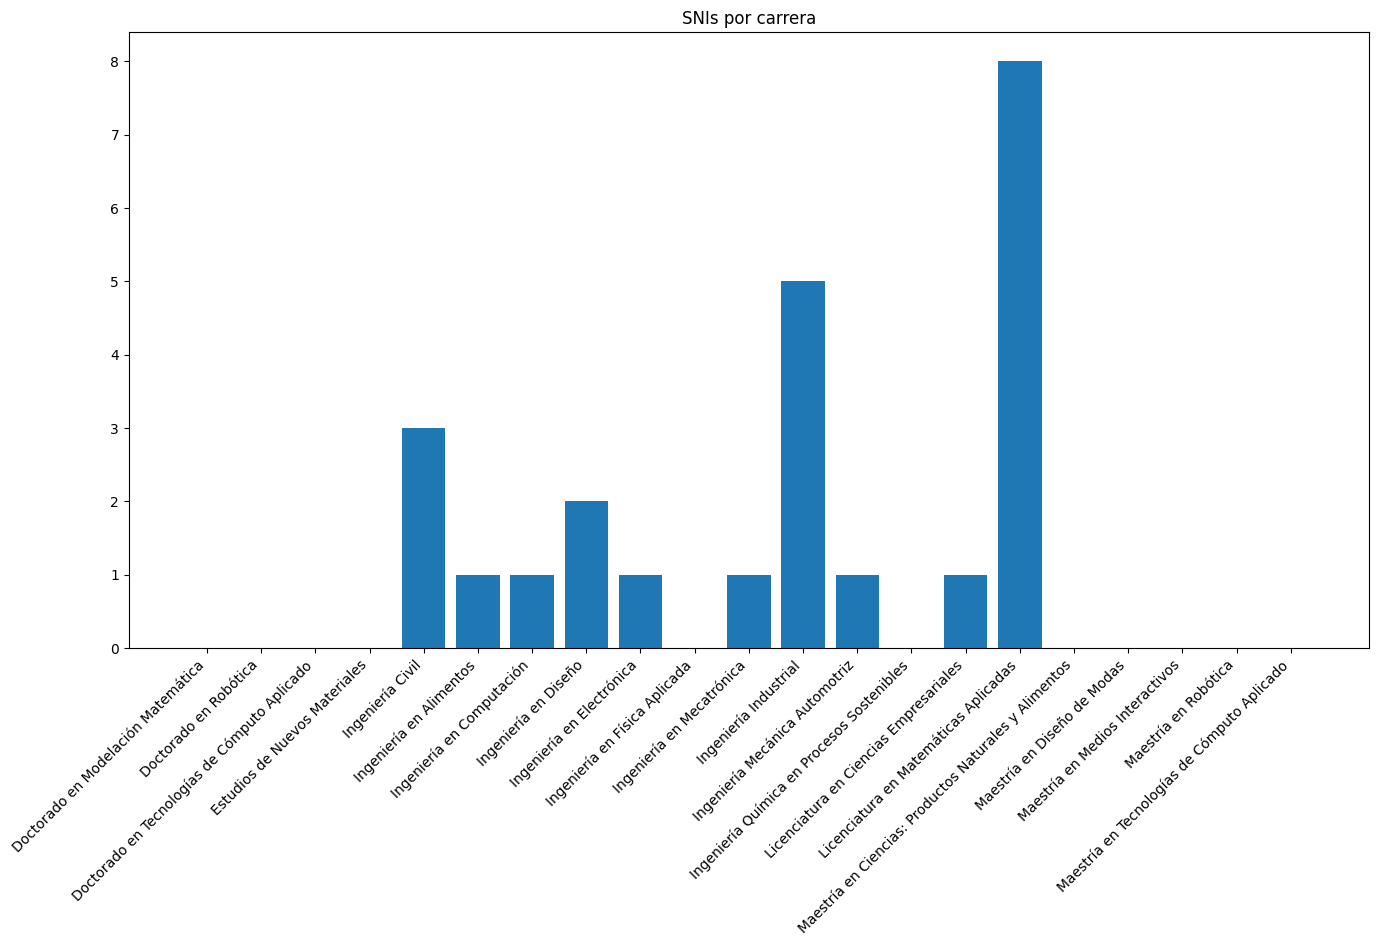

In [6]:
customBarPlot(snis_carrera["carrera"], snis_carrera["cantidad"], 'SNIs por carrera')

### Graficar el número de SNIs por instituto

In [7]:
snis_institutos = pd.read_sql_query(
    """
   SELECT
    	institutos.nombre as institutos,
    	count(sni.nivelSNI) as cantidad
    FROM
    	profesor
    LEFT JOIN carreras ON profesor.idCarrera = carreras.codigo
    LEFT JOIN institutos ON carreras.idInstituto = institutos.codigo
    LEFT JOIN sni ON profesor.correo = sni.correoProfesor
    GROUP BY institutos.nombre
    """,
    mysql_conn
)

In [8]:
snis_institutos

,institutos,cantidad
0,Centro de Estudios de Nuevos Materiales,0
1,Instituto de agroindustrias,1
2,Instituto de ciencias sociales y humanidades,1
3,Instituto de computación,1
4,Instituto de diseño,5
5,Instituto de electrónica y mecatrónica,2
6,Instituto de física y matemáticas,11
7,Instituto de Ingeniería Industrial y Automotriz,7
8,Posgrado,0


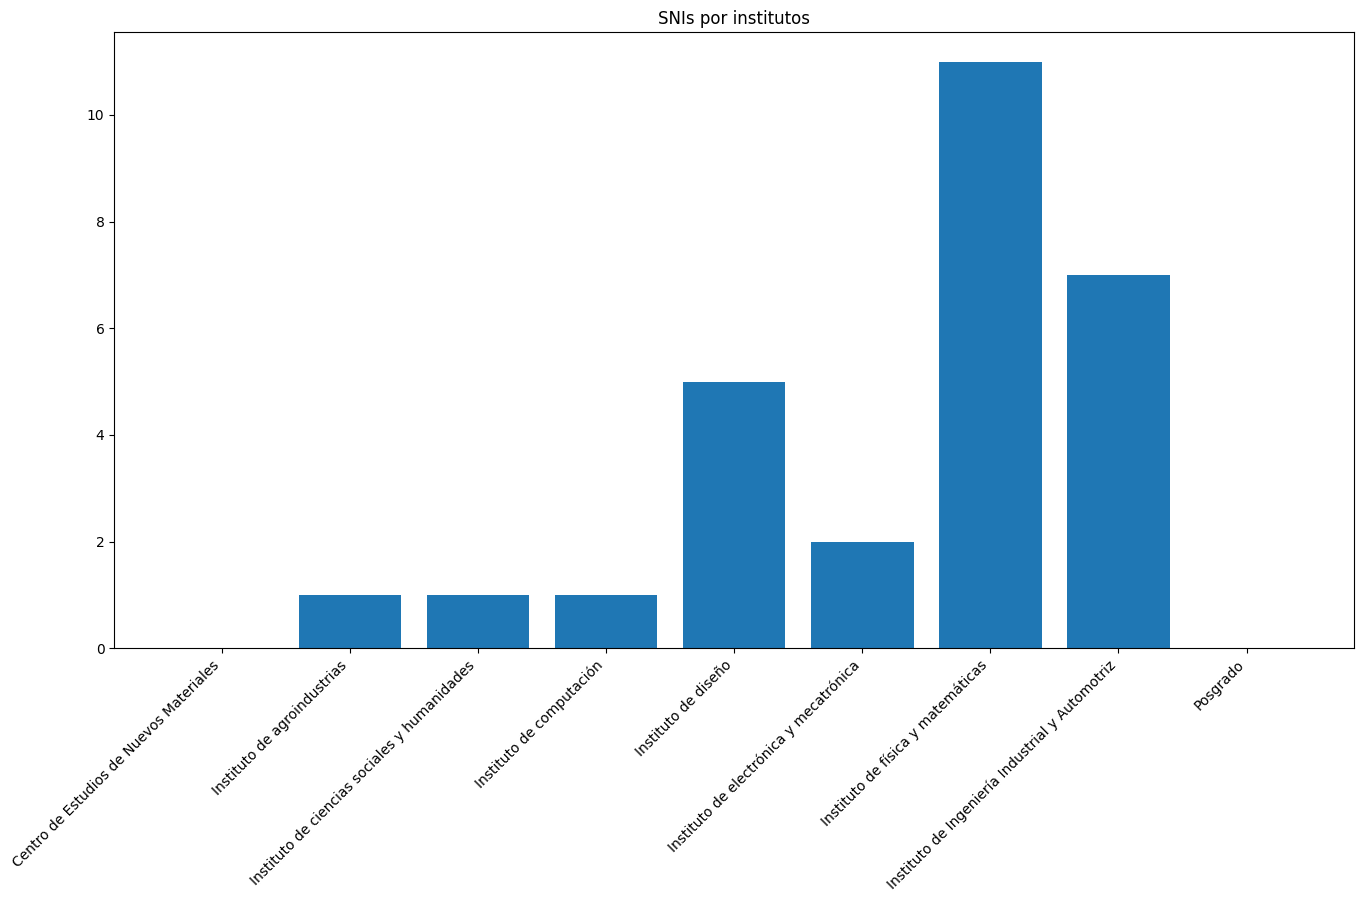

In [9]:
customBarPlot(snis_institutos["institutos"], snis_institutos["cantidad"], 'SNIs por institutos')

### Graficar el número de artículos por carrera

In [10]:
articulos_carrera = pd.read_sql_query(
    """
    SELECT
    	carreras.nombre as carrera,
         SUM(CASE
            WHEN profesoryarticulo.pos = 1 THEN 1 -- SOLO PRIMER AUTOR
            ELSE 0
        END) as conteo
    FROM profesor
    LEFT JOIN profesoryarticulo ON profesor.correo = profesoryarticulo.correo
    LEFT JOIN carreras ON profesor.idCarrera = carreras.codigo
    GROUP BY carreras.nombre
    """,
    mysql_conn
)

In [11]:
articulos_carrera

,carrera,conteo
0,Doctorado en Modelación Matemática,0.0
1,Doctorado en Robótica,0.0
2,Doctorado en Tecnologías de Cómputo Aplicado,0.0
3,Estudios de Nuevos Materiales,0.0
4,Ingeniería Civil,2.0
5,Ingeniería en Alimentos,0.0
6,Ingeniería en Computación,2.0
7,Ingeniería en Diseño,0.0
8,Ingeniería en Electrónica,2.0
9,Ingeniería en Física Aplicada,2.0


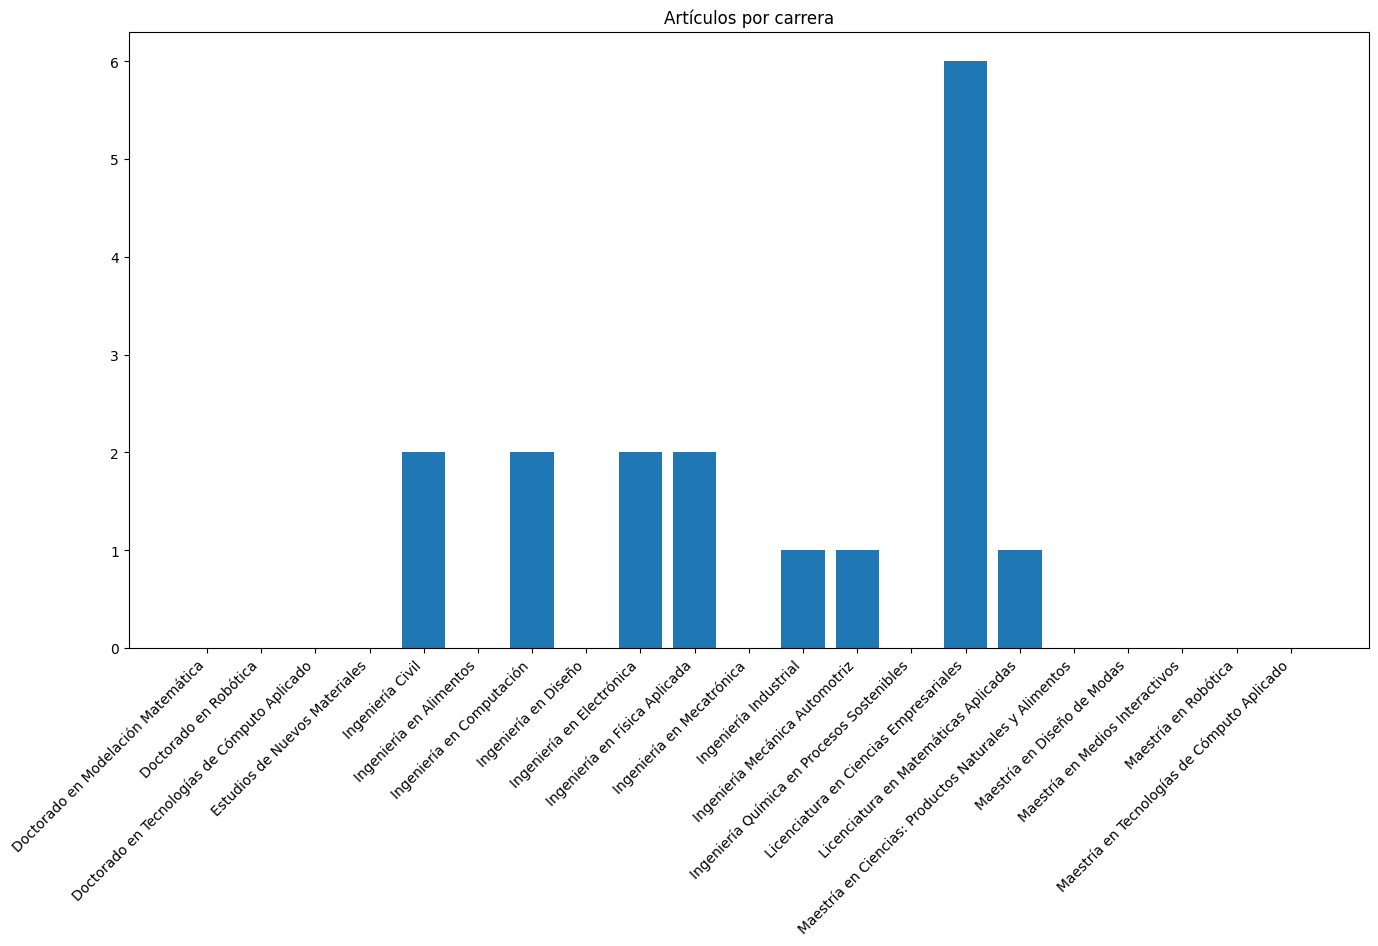

In [12]:
customBarPlot(articulos_carrera["carrera"], articulos_carrera["conteo"], 'Artículos por carrera')

### Graficar el número de actividades por carrera

In [13]:
actividades_por_carrera = pd.read_sql_query(
    """
        SELECT
        	carreras.nombre as carrera,
        	count(actividades.correoProfesor) as conteo
        FROM profesor
        LEFT JOIN actividades ON profesor.correo = actividades.correoProfesor
        LEFT JOIN carreras ON profesor.idCarrera = carreras.codigo
        GROUP BY carreras.nombre
    """,
    mysql_conn
)

In [14]:
actividades_por_carrera

,carrera,conteo
0,Doctorado en Modelación Matemática,1
1,Doctorado en Robótica,0
2,Doctorado en Tecnologías de Cómputo Aplicado,0
3,Estudios de Nuevos Materiales,0
4,Ingeniería Civil,0
5,Ingeniería en Alimentos,2
6,Ingeniería en Computación,3
7,Ingeniería en Diseño,1
8,Ingeniería en Electrónica,2
9,Ingeniería en Física Aplicada,3


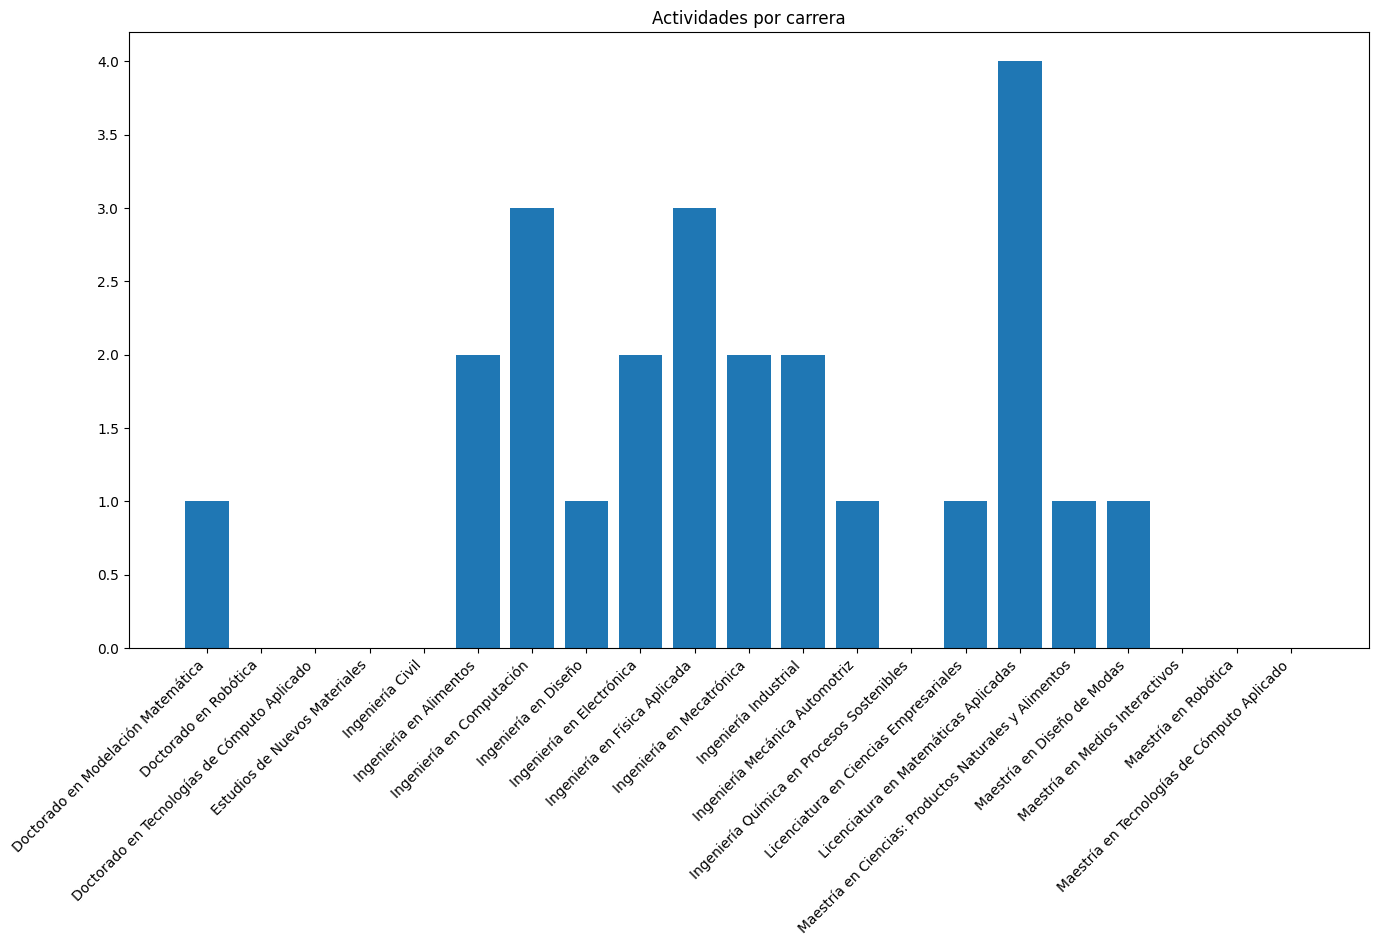

In [15]:
customBarPlot(actividades_por_carrera["carrera"], actividades_por_carrera["conteo"], 'Actividades por carrera')

### Graficar el número tesistas por carrera

In [16]:
tesistas_por_carrera = pd.read_sql_query(
    """
    SELECT
    	carreras.nombre as carrera,
    	count(profesorytesis.correo) as conteo
    FROM profesor
    LEFT JOIN profesorytesis ON profesor.correo = profesorytesis.correo
    LEFT JOIN carreras ON profesor.idCarrera = carreras.codigo
    GROUP BY carreras.nombre
    """,
    mysql_conn
)

In [17]:
tesistas_por_carrera

,carrera,conteo
0,Doctorado en Modelación Matemática,1
1,Doctorado en Robótica,0
2,Doctorado en Tecnologías de Cómputo Aplicado,0
3,Estudios de Nuevos Materiales,0
4,Ingeniería Civil,0
5,Ingeniería en Alimentos,1
6,Ingeniería en Computación,4
7,Ingeniería en Diseño,0
8,Ingeniería en Electrónica,2
9,Ingeniería en Física Aplicada,0


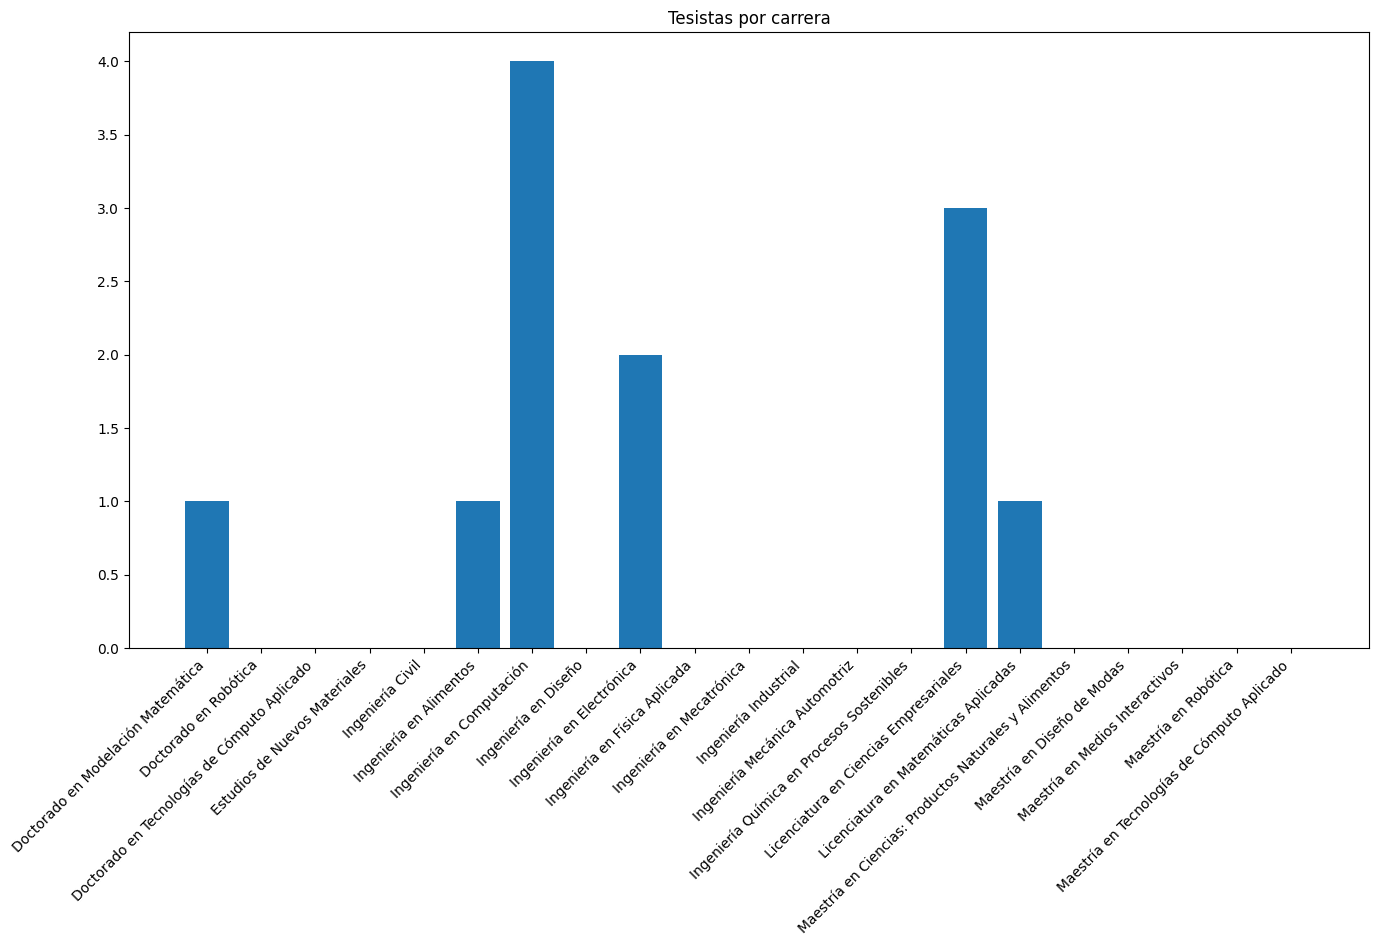

In [18]:
customBarPlot(tesistas_por_carrera["carrera"], tesistas_por_carrera["conteo"], 'Tesistas por carrera')

### Graficar el número de tesistas por profesor de una carrera determinada

In [19]:
tesistas_ing_computacion = pd.read_sql_query(
    """
    SELECT
    	profesor.nombre,
    	count( profesorytesis.correo) as conteo
    FROM profesor
    INNER JOIN profesorytesis ON profesor.correo = profesorytesis.correo
    INNER JOIN carreras ON profesor.idCarrera = carreras.codigo
    WHERE
    	carreras.nombre = 'Ingeniería en Computación'
    GROUP BY profesor.nombre
    """,
    mysql_conn
)

In [20]:
tesistas_ing_computacion

,nombre,conteo
0,Celia Bertha Reyes Espinoza,1
1,Enrique Guzman,2
2,María Esperanza Pérez Cordoba Sánchez,1


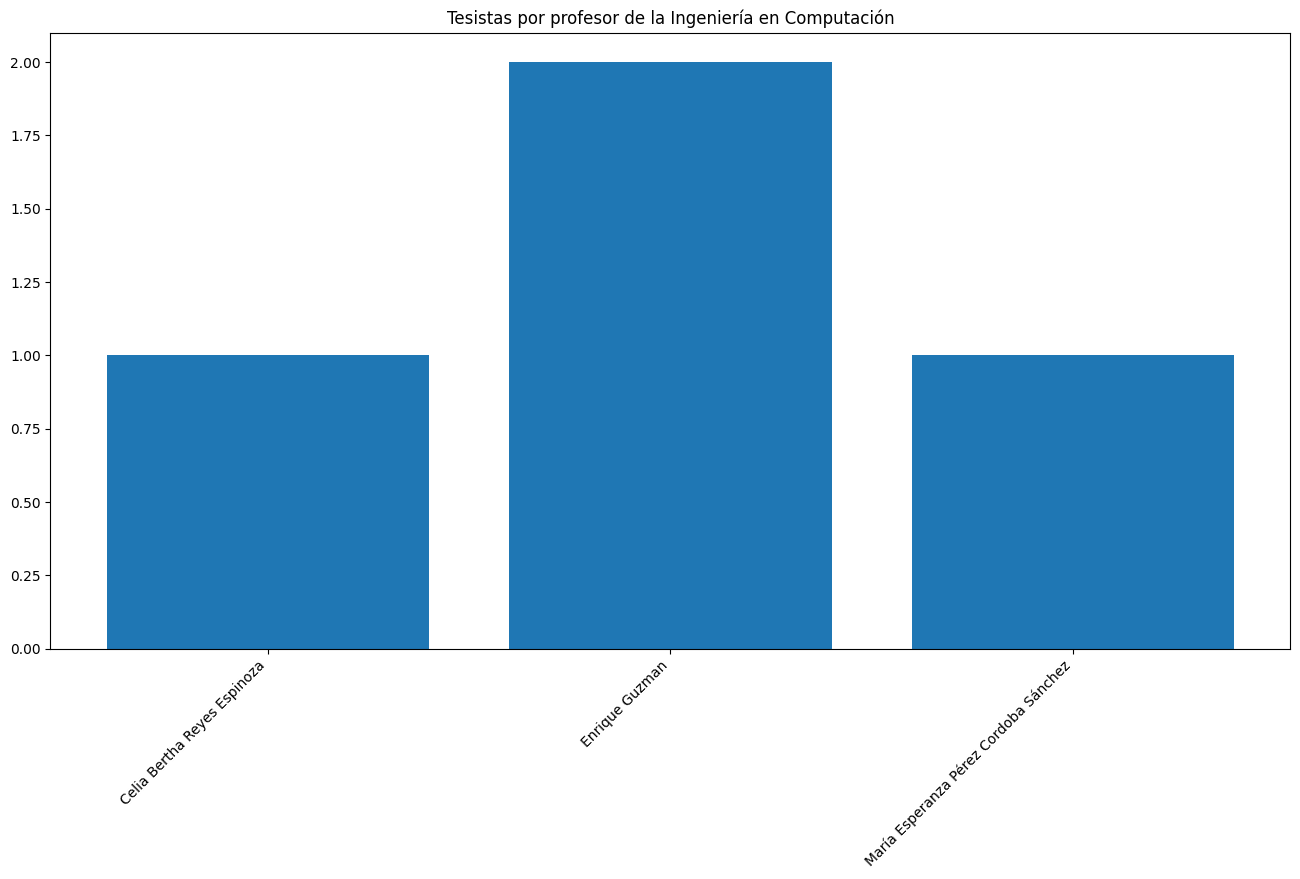

In [21]:
customBarPlot(tesistas_ing_computacion["nombre"], tesistas_ing_computacion["conteo"], 'Tesistas por profesor de la Ingeniería en Computación')

### Graficar el número de materias por profesor de una carrera determinada

In [22]:
materias_profesor_ing_comp = pd.read_sql_query(
    """
    SELECT
    	profesor.nombre,
    	count(materias.nombre) as conteo
    FROM profesor
    INNER JOIN profesorymateria ON profesor.correo = profesorymateria.profesor
    INNER JOIN materias ON profesorymateria.idMateria = materias.id
    INNER JOIN planes ON materias.idPlan = planes.id
    INNER JOIN carreras ON planes.codigoCarrera = carreras.codigo
    WHERE
    	carreras.nombre = 'Ingeniería en Computación'
    GROUP BY profesor.nombre
    """,
    mysql_conn
)

In [23]:
materias_profesor_ing_comp

,nombre,conteo
0,Consuelo Jaqueline Estrada Bautista,2
1,Enrique Espinosa Justo,1
2,Héctor Gerardo Campos Silva,1
3,Liliana Eneida Sánchez Platas,1
4,Moisés Emmanuel Ramírez Guzmán,1
5,Profesor 1 Empresariales,1
6,Rafael Adrian García García,2
7,Wendy Yaneth García Martínez,1


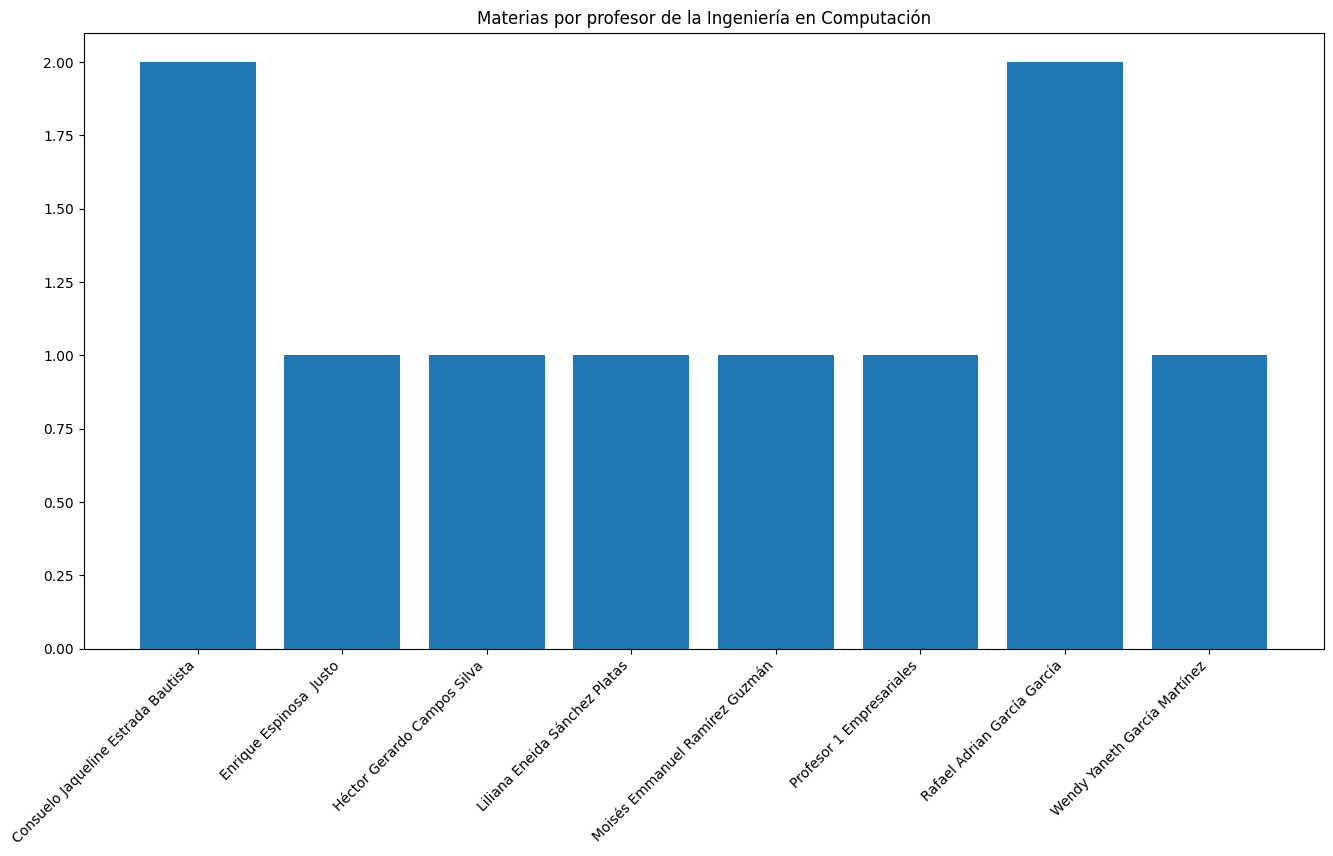

In [24]:
customBarPlot(materias_profesor_ing_comp["nombre"], materias_profesor_ing_comp["conteo"], 'Materias por profesor de la Ingeniería en Computación')

### Graficar el número de comisiones por profesor de una carrera determinada

In [25]:
comisiones_profesor_cien_emp = pd.read_sql_query(
    """
    SELECT
    	profesor.nombre,
    	count(profesorycomision.correoProfesor) as conteo
    FROM profesor
    INNER JOIN profesorycomision ON profesor.correo = profesorycomision.correoProfesor
    INNER JOIN carreras ON profesor.idCarrera = carreras.codigo
    WHERE
    	carreras.nombre = 'Licenciatura en Ciencias Empresariales'
    GROUP BY profesor.nombre
    """,
    mysql_conn
)

In [26]:
comisiones_profesor_cien_emp

,nombre,conteo
0,Conrado Aguilar Cruz,1
1,Ignacio Castellanos Balderas,1
2,Profesor 1 Empresariales,1


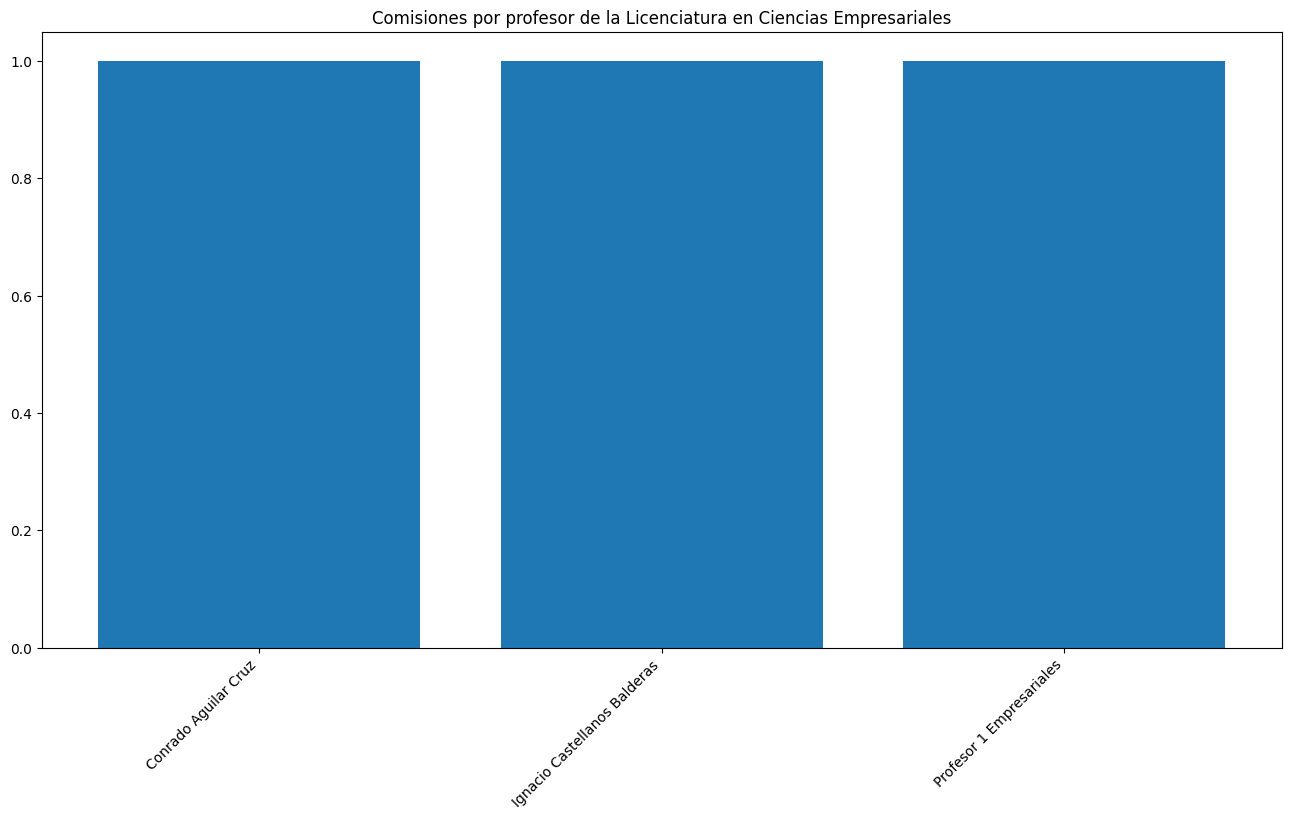

In [27]:
customBarPlot(comisiones_profesor_cien_emp["nombre"], comisiones_profesor_cien_emp["conteo"], 'Comisiones por profesor de la Licenciatura en Ciencias Empresariales')

### Graficar el número de eventos por profesor de una carrera determinada

In [28]:
eventos_profesor_mat_apl = pd.read_sql_query(
    """
    SELECT
    	profesor.nombre,
    	count(eventos.correoProfesor) as conteo
    FROM profesor
    INNER JOIN eventos ON profesor.correo = eventos.correoProfesor
    INNER JOIN carreras ON profesor.idCarrera = carreras.codigo
    WHERE
    	carreras.nombre = 'Licenciatura en Matemáticas Aplicadas'
    GROUP BY profesor.nombre
    """,
    mysql_conn
)

In [29]:
eventos_profesor_mat_apl

,nombre,conteo
0,Adolfo Maceda Méndez,3
1,Jesús Fernando Tenorio Arvide,4
2,Salvador Sánchez Perales,1


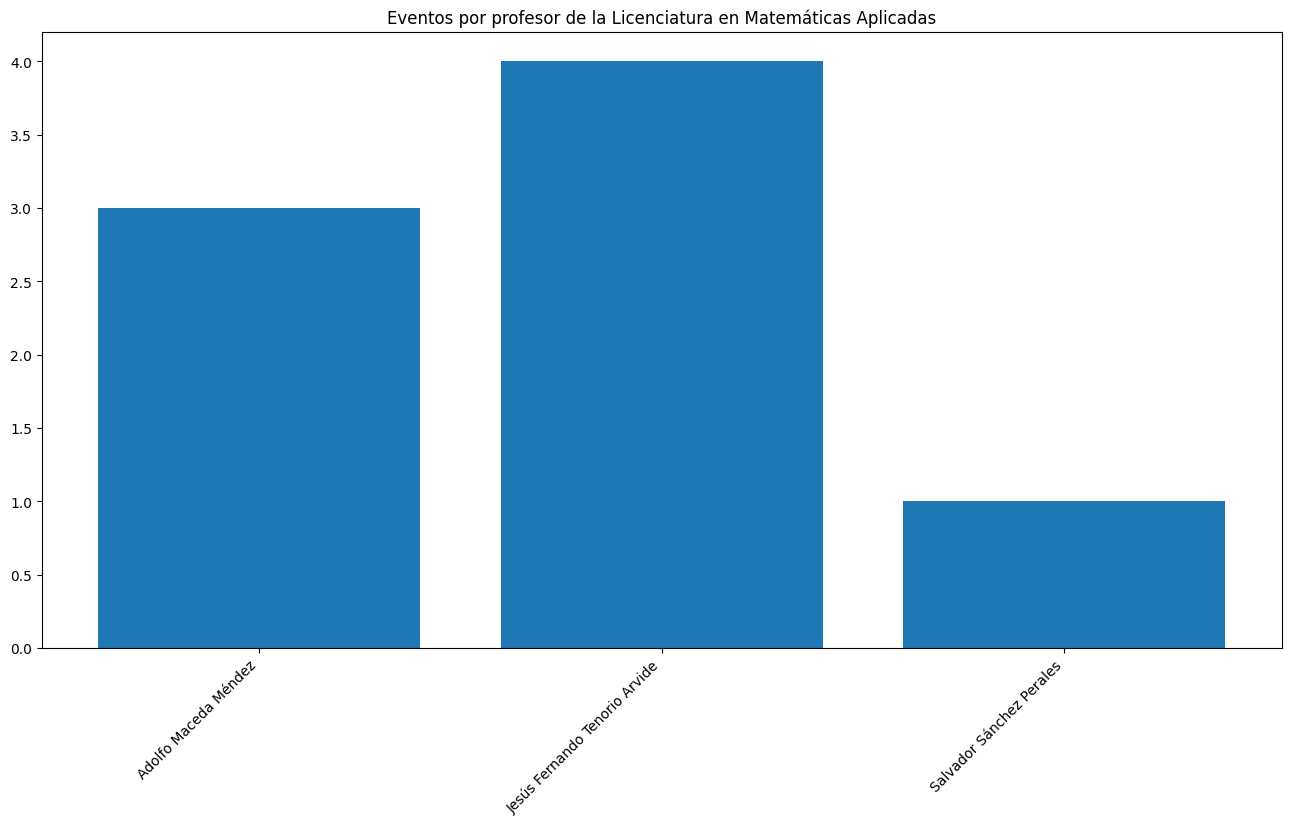

In [30]:
customBarPlot(eventos_profesor_mat_apl["nombre"], eventos_profesor_mat_apl["conteo"], 'Eventos por profesor de la Licenciatura en Matemáticas Aplicadas')